# Ergänzende Fragen:

1. Mit welcher Polung ist Detektor anzuschließen?\
Sperrichtung (Anode an n-dotiert, Kathode an p-dotiert) für große Sperrschicht zum Messen
3. Dicke der Verarmungszone bei einer Detektorspannung von $U=40V$?\
$d=\sqrt{\frac{2\epsilon U}{eN}}$\
N bezieht sich auf die kleinere der Dotierungsschichten
4. Kapazität des Detektors?\
$C=\frac{\epsilon A}{d}$

In [1]:
from math import sqrt, log
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import *
import scipy.integrate as integrate

# 4. Linearitätsprüfung
Erste grobe Überprüfung

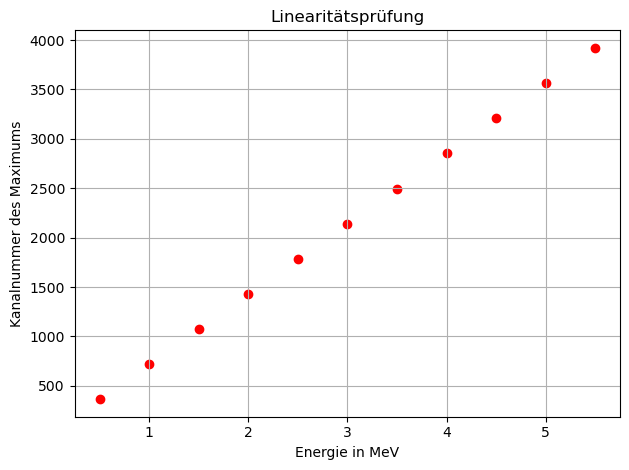

In [5]:
lin_energy = 0.5 * np.array([i+1 for i in range(11)])
max_channel = np.array([365,718,1073,1427,1784,2136,2496,2854,3208,3567,3921])

plt.scatter(lin_energy,max_channel,color='red')
plt.title(r'Linearitätsprüfung')
plt.xlabel(r'Energie in MeV')
plt.ylabel('Kanalnummer des Maximums')
plt.grid()
plt.tight_layout()

# Ergänzende Fragen

Reichweite eines 5.5 MeV alpha-Teilchens im Si-Detektor ?

In [7]:
def beta(v):
    return v/c

def gamma(v):
    return 1.0/sqrt(1-beta(v)*beta(v))

def rel_speed(E,m0):
    # bedenken, dass E hier die kinetische Energie beschreibt;
    # Die Ruhemasse m0c**2 muss auch berücksichtigt werden.
    ayuda = 1.0-1.0/(1.0+E/m0/c/c)**2
    return sqrt(ayuda) * c

def bethe(E,m0,Z,Eb,ne):
    # Energieverlust nach Bethe-Bloch (negatives Vorzeichen schon berücksichtigt)
    v = rel_speed(E,m0)
    b = beta(v)
    factor = -Z**2*e**4*ne/4/pi/epsilon_0/epsilon_0/v/v/m_e
    return factor*(log(2.0*m_e*v**2/Eb)-log(1-b**2)-b**2)

In [24]:
m_he = 2*m_p+2*m_n #Masse Helium-Kern
Z = 2 # Ladungszahl Helium
#
# Für Silizium ist Elektronendichte wahrscheinlich noch falsch
#
ne = 1.5e28 # Elektronendichte Target pro m**2
EB = 8.15*1.60218e-19 # mittlere Bindungsenergie Target (Silizium) in Joule; nutze stellvertretend 1. Ionisierungsenergie
# Werte beziehen sich auf alpha-Teilchen, welches in Silizium gestoppt wird.

In [19]:
Ekin = 5.5*10e6*1.60218e-19 # umgerechnet von eV in Joule
dx = 1e-6 # Schrittgröße 1 micrometer
energy = np.array([Ekin])
x = 0.0
path = np.array([x])

while Ekin > 0.0:
    dE = bethe(Ekin,m_he,Z,EB,ne)*dx
    x += dx
    Ekin += dE
    if Ekin > 0.0:
        energy = np.append(energy,[Ekin])
        path = np.append(path,[x])
print('Eindringtiefe in Meter:',x)

Eindringtiefe in Meter: 0.0003410000000000018


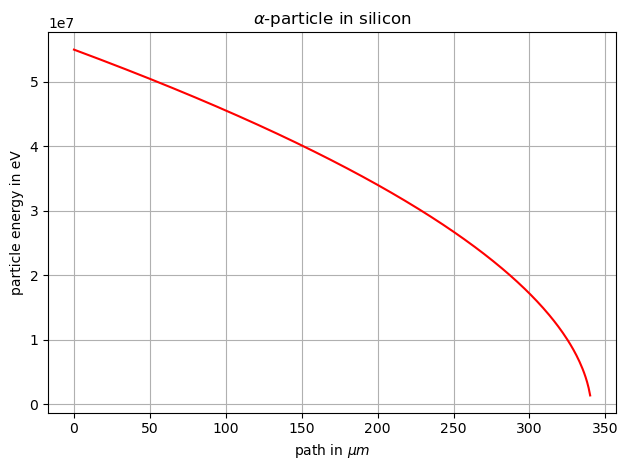

In [25]:
# rechne path und in energy vor dem Plotten in micrometer und eV zurück.
plt.plot(path*1e6,energy/1.60218e-19,color='red')
plt.title(r'$\alpha$-particle in silicon')
plt.xlabel(r'path in $\mu m$')
plt.ylabel('particle energy in eV')
plt.grid()
plt.tight_layout()